In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import pandas as pd
data = pd.read_csv('../wavefiles.csv')
data

,file_name,classID,label
0,melody0.wav,1,antiviral
1,melody1.wav,1,antiviral
2,melody2.wav,1,antiviral
3,melody3.wav,1,antiviral
4,melody4.wav,1,antiviral
...,...,...,...
1698,melody1698.wav,4,anti-coronavirus
1699,melody1699.wav,4,anti-coronavirus
1700,melody1700.wav,4,anti-coronavirus
1701,melody1701.wav,4,anti-coronavirus


In [3]:
Directory = 'C:/Users/JVS Tanish/Downloads/MidMinorProject/music-melodies'

In [4]:
from tqdm import tqdm
import os
extracted_data = []
for index,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(Directory),str(row["file_name"]))
    class_labels= row["label"]
    y,sr = librosa.load(file_name, res_type='kaiser_fast')
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    extracted_data.append([scaled_feature, class_labels])

1703it [03:59,  7.10it/s]


In [5]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])

In [6]:
x = np.array(feature_df['feature'].tolist())

In [7]:
y = np.array(feature_df['class'].tolist())

In [8]:
print(x.shape)
print(y.shape)

(1703, 50)
(1703,)


In [9]:
from sklearn import preprocessing

OHE_Function = OneHotEncoder()
Scaler_Function = StandardScaler()

In [10]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(y).reshape(-1,1)).toarray()
print(Part_Y_Encode.shape)

(1703, 4)


In [11]:
xTrain,xTest,yTrain,yTest = train_test_split(x,Part_Y_Encode,train_size=0.8,random_state=42,shuffle=True)

print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(1362, 50)
(1362, 4)
(341, 50)
(341, 4)


In [14]:
xTrain = Scaler_Function.fit_transform(xTrain)
xTest = Scaler_Function.transform(xTest)

In [15]:
print(xTrain.shape)
print(xTest.shape)

(1362, 50)
(341, 50)


In [16]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

print(xTrain.shape)
print(xTest.shape)

(1362, 50, 1)
(341, 50, 1)


In [17]:
output_labels = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = "adam"

In [18]:
import tensorflow as tf
Call_Back_Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Call_Back_Check = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_CNN_model")

In [23]:
Model_Conv1D = Sequential()
#
Model_Conv1D.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=(xTrain.shape[1],1)))
Model_Conv1D.add(BatchNormalization())
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))
#
Model_Conv1D.add(Conv1D(256,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.2))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))


Model_Conv1D.add(Conv1D(128,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.2))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))


Model_Conv1D.add(Conv1D(64,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.2))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))
#
Model_Conv1D.add(Flatten())
Model_Conv1D.add(Dense(units=1024, activation='relu'))
Model_Conv1D.add(Dropout(0.2))
#
Model_Conv1D.add(Dense(units=output_labels, activation='softmax'))

In [24]:
Model_Conv1D.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 50, 256)           1536      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 256)          1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 25, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 25, 256)           327936    
                                                                 
 dropout_4 (Dropout)         (None, 25, 256)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 13, 256)         

In [25]:
Model_Conv1D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [26]:
Conv1D_Model = Model_Conv1D.fit(xTrain, yTrain, batch_size=128, epochs=50,
                                validation_data=(xTest, yTest), callbacks=[Call_Back_Early_Stop,Call_Back_Check])

Epoch 1/50
11/11 [==============================] - 2s 142ms/step - loss: 1.7107 - accuracy: 0.3385 - val_loss: 1.3667 - val_accuracy: 0.4252
Epoch 2/50
11/11 [==============================] - 1s 121ms/step - loss: 1.2165 - accuracy: 0.4427 - val_loss: 1.3696 - val_accuracy: 0.3343
Epoch 3/50
11/11 [==============================] - 1s 125ms/step - loss: 1.1486 - accuracy: 0.4816 - val_loss: 1.3575 - val_accuracy: 0.4516
Epoch 4/50
11/11 [==============================] - 1s 118ms/step - loss: 1.0953 - accuracy: 0.5308 - val_loss: 1.3469 - val_accuracy: 0.4311
Epoch 5/50
11/11 [==============================] - 1s 121ms/step - loss: 1.0203 - accuracy: 0.5617 - val_loss: 1.3411 - val_accuracy: 0.4751
Epoch 6/50
11/11 [==============================] - 1s 120ms/step - loss: 0.9539 - accuracy: 0.5910 - val_loss: 1.3375 - val_accuracy: 0.5630
Epoch 7/50
11/11 [==============================] - 1s 131ms/step - loss: 0.9409 - accuracy: 0.6145 - val_loss: 1.3304 - val_accuracy: 0.5220
Epoch 

INFO:tensorflow:Assets written to: .\my_CNN_model\assets


INFO:tensorflow:Assets written to: .\my_CNN_model\assets


11/11 [==============================] - 3s 243ms/step - loss: 0.6046 - accuracy: 0.7614 - val_loss: 1.1914 - val_accuracy: 0.6862
Epoch 20/50
11/11 [==============================] - ETA: 0s - loss: 0.5629 - accuracy: 0.7695

INFO:tensorflow:Assets written to: .\my_CNN_model\assets


INFO:tensorflow:Assets written to: .\my_CNN_model\assets


11/11 [==============================] - 3s 258ms/step - loss: 0.5629 - accuracy: 0.7695 - val_loss: 1.1669 - val_accuracy: 0.6979
Epoch 21/50
11/11 [==============================] - 1s 122ms/step - loss: 0.5955 - accuracy: 0.7775 - val_loss: 1.1705 - val_accuracy: 0.6833
Epoch 22/50
11/11 [==============================] - ETA: 0s - loss: 0.5291 - accuracy: 0.7834

INFO:tensorflow:Assets written to: .\my_CNN_model\assets


INFO:tensorflow:Assets written to: .\my_CNN_model\assets


11/11 [==============================] - 3s 263ms/step - loss: 0.5291 - accuracy: 0.7834 - val_loss: 1.1205 - val_accuracy: 0.7097
Epoch 23/50
11/11 [==============================] - 1s 131ms/step - loss: 0.5050 - accuracy: 0.7996 - val_loss: 1.1465 - val_accuracy: 0.6393
Epoch 24/50
11/11 [==============================] - 1s 121ms/step - loss: 0.5254 - accuracy: 0.7805 - val_loss: 1.0900 - val_accuracy: 0.6657
Epoch 25/50
11/11 [==============================] - 1s 124ms/step - loss: 0.4949 - accuracy: 0.7974 - val_loss: 1.0905 - val_accuracy: 0.6540
Epoch 26/50
11/11 [==============================] - 1s 130ms/step - loss: 0.4903 - accuracy: 0.8106 - val_loss: 1.0782 - val_accuracy: 0.6745
Epoch 27/50
11/11 [==============================] - 1s 128ms/step - loss: 0.4618 - accuracy: 0.8238 - val_loss: 1.0938 - val_accuracy: 0.6422
Epoch 28/50
11/11 [==============================] - 1s 124ms/step - loss: 0.4311 - accuracy: 0.8363 - val_loss: 1.0487 - val_accuracy: 0.6540
Epoch 29/50

In [29]:
train_accuracy = Model_Conv1D.evaluate(xTrain, yTrain, verbose=0)
print("Training Accuracy of CNN: ", train_accuracy[1])

test_accuracy = Model_Conv1D.evaluate(xTest, yTest, verbose=0)
print("Testing Accuracy of CNN: ", test_accuracy[1])

Training Accuracy of CNN:  0.946402370929718
Testing Accuracy of CNN:  0.6891495585441589


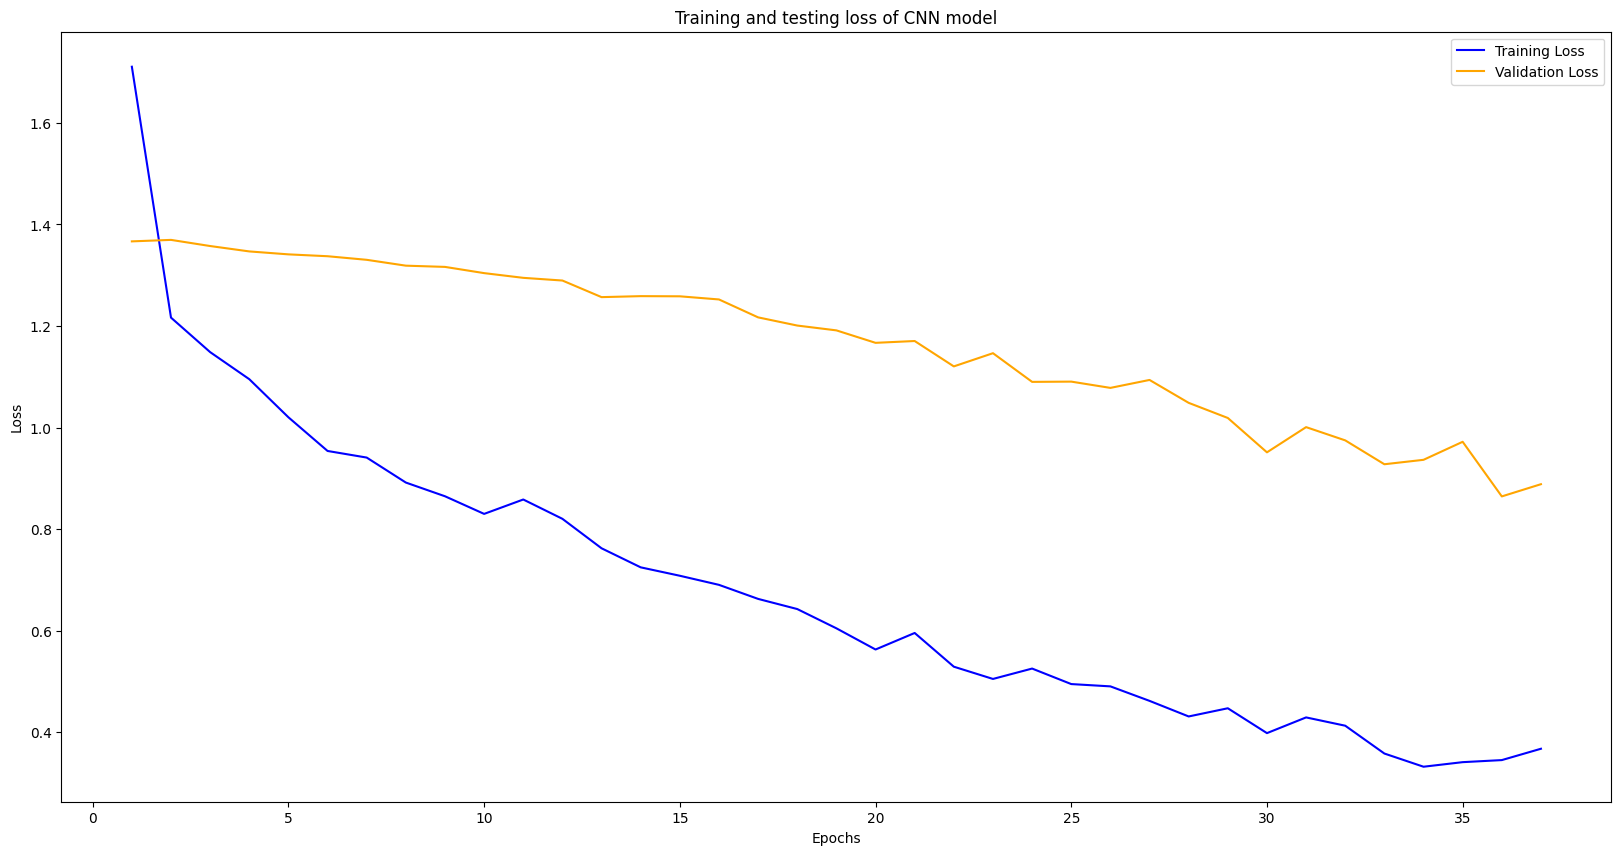

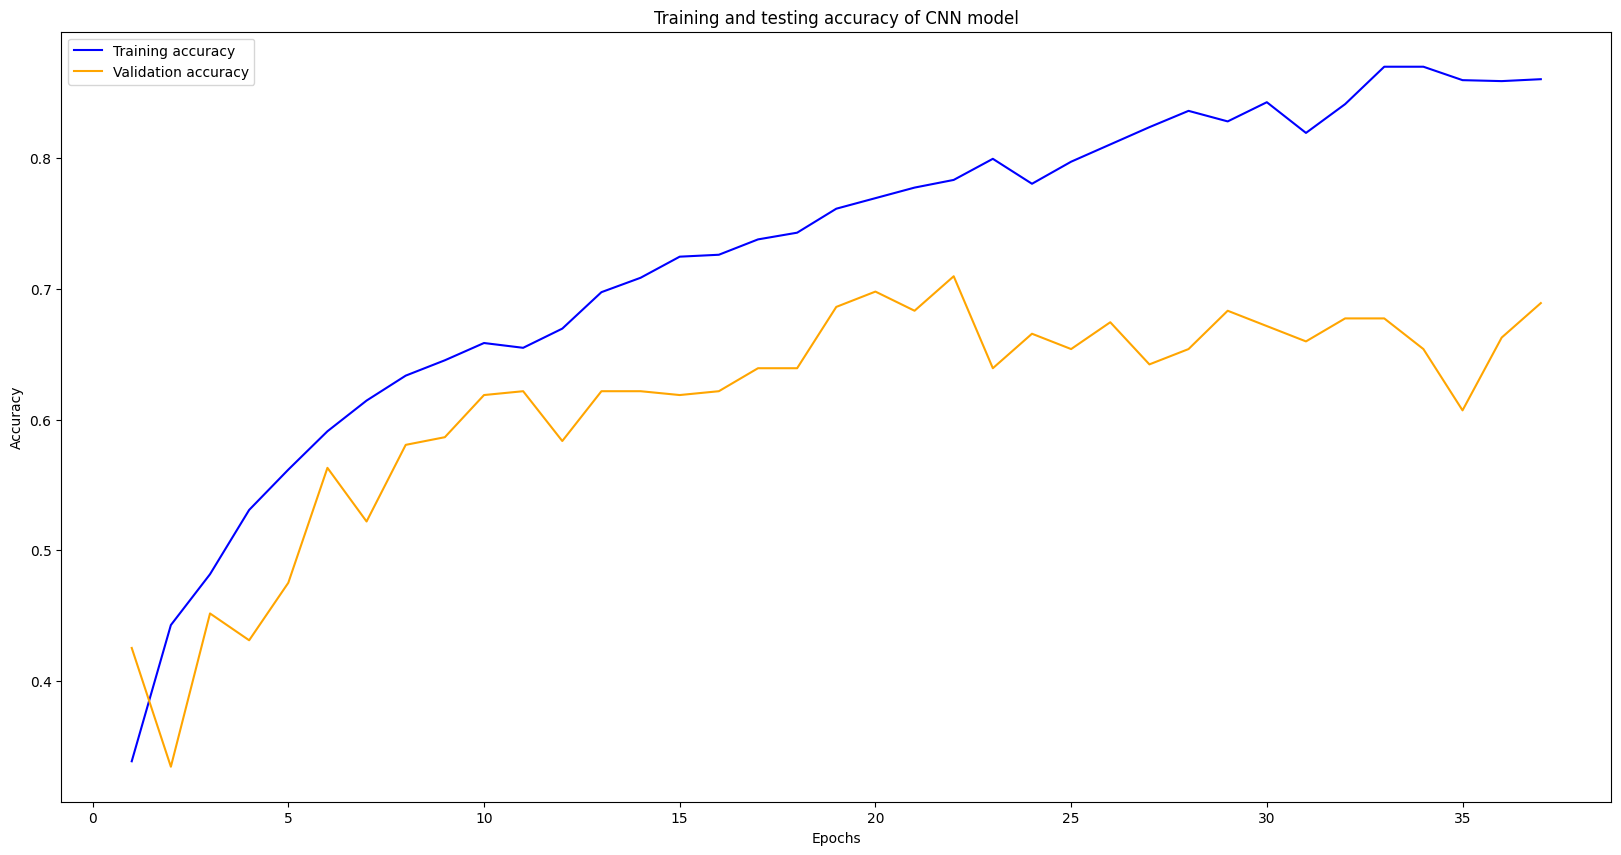

In [79]:
history_dict=Conv1D_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,38)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of CNN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of CNN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
Model_Conv1D.save('saved_models/CNN_model')

INFO:tensorflow:Assets written to: saved_models/CNN_model\assets


INFO:tensorflow:Assets written to: saved_models/CNN_model\assets


In [63]:
import tensorflow as tf
CNN_model=tf.keras.models.load_model('saved_models/CNN_model')

In [68]:
y_pred = CNN_model.predict(xTest)

11/11 [==============================] - 0s 11ms/step


In [69]:
y_pred

array([[0.04353394, 0.02162133, 0.07095552, 0.8638892 ],
       [0.18627624, 0.53155315, 0.22734095, 0.05482965],
       [0.29052103, 0.24016722, 0.28900746, 0.18030436],
       ...,
       [0.48472196, 0.34408474, 0.0909692 , 0.08022415],
       [0.18127443, 0.6635873 , 0.10761872, 0.04751956],
       [0.07154682, 0.5577445 , 0.34050167, 0.03020705]], dtype=float32)

In [36]:
y_pred_labels=[]
for j in range (0,len(y_pred)):
    max=y_pred[j][0]
    index=0
    for i in range(1,len(y_pred[j])):
        if(y_pred[j][i]>max):
            max=y_pred[j][i]
            index=i
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_pred_labels.append(class_name)

In [38]:
y_test_labels=[]
for j in range (0,len(yTest)):
    index=0
    for i in range(0,len(yTest[j])):
        if(yTest[j][i]==1):
            max=yTest[j][i]
            index=i
            break
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_test_labels.append(class_name)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_labels, y_pred_labels)

In [40]:
cm_df = pd.DataFrame(cm, index = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'], 
                     columns = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'])
cm_df

,anti-coronavirus,antiviral,exp-non-antiviral,random-seq-non-antiviral
anti-coronavirus,5,11,2,4
antiviral,4,96,17,8
exp-non-antiviral,8,13,47,12
random-seq-non-antiviral,1,10,16,87


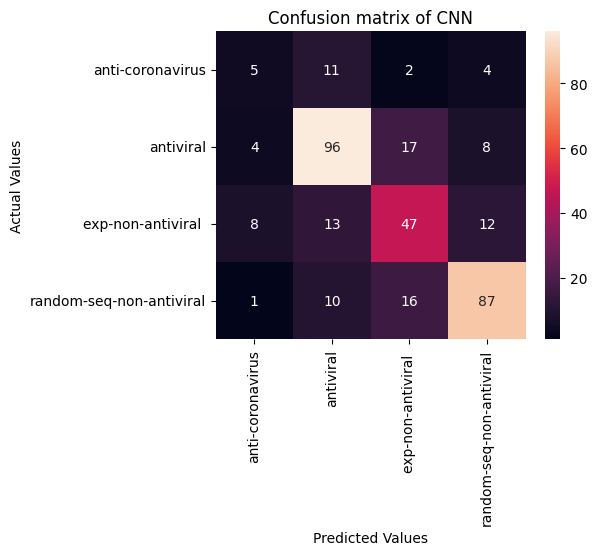

In [41]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True, fmt = 'd')
plt.title("Confusion matrix of CNN")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [43]:
print('                   Classification report of CNN')
print('                   -----------------------------')
print('')
print(classification_report(y_test_labels, y_pred_labels))

                   Classification report of CNN
                   -----------------------------

                          precision    recall  f1-score   support

        anti-coronavirus       0.28      0.23      0.25        22
               antiviral       0.74      0.77      0.75       125
       exp-non-antiviral       0.57      0.59      0.58        80
random-seq-non-antiviral       0.78      0.76      0.77       114

                accuracy                           0.69       341
               macro avg       0.59      0.59      0.59       341
            weighted avg       0.69      0.69      0.69       341



In [52]:
def features_extractor(file_name):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features